# CS145: Project 2 | Analyzing Movie and Movie Review Datasets

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* Marcus Llorente, llorente
* Gerald Kang, gkang03

## Project Overview

---

As movie lovers, we realized that big data for movies comes in all sorts of fun and pragmatic applications; in class, we learn about complex recommendation systems that webapps like Netflix use, IMDB rating schemes that many third party apps build entire databases from, and social media apps like Letterboxd that run off big data for movies. We decided to further explore these datasets in our own lens in this final project to examine trends between users and movies, as well as make ML-backed predictions coupled with unique and interesting questions.

The central question we wish to answer is: **To what extent is movie popularity impacted by a movie's resources/characteristics (e.g. cast, crew, genre) versus public opinion/demographics? And in turn, how can we correlate movie popularity with movie ratings?**

We define movie popularity as the number of total votes received on IMDB. Though the ratings we use are from databases other than IMDB, we still use the IMDB vote count as overall popularity in order to normalize popularity metrics to one database. Additionally, we reason that IMDB is the most frequented review site out of the review sites we are using, so it best represents the popularity as it garners more users.

Our data explorations/analysis as well as our ML predictions revolve around this central question. We explore trends between various movie characteristics, user ratings and demographics, and movie critic ratings, among other things, against a movie's calculated popularity. Some questions we wish to explore in order answer our central question include:
*   How do movie ratings correlate with movie popularity? Does a strong correlation even exist with ratings?
*   To what extent are movie popularities impacted by a specific database? Is there a specific database that correlates to popularity more, and if so, what can we say about this database?
*   Are user demographics such as occupation, age, and location correlated with movie popularity?
*   Are there certain directors/writers, genres, or tags that are strongly correlated with higher popularity?
*   Is there bias present amongst movie tags/genres and a movies ratings/popularity?
*   Do more popular movies tend to be higher rated?
---


## Analysis of Dataset

##Dataset Summary
We are using a total of four datasets in this project, listed as follows:

*   [`The MovieLens Dataset`](https://grouplens.org/datasets/movielens/25m/) (1.16 GB): Contains more information about movies (reviews, and tags) along with the users who rated them (occupation, age, zipcode). This has our ratings dataset from the MovieLens website.
*   [`The Movies Dataset`](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data?select=credits.csv) (943.76 MB): Information about movies including budget, cast, and rating (metadata of following TMDB data). This has our ratings dataset from TMDB website.
*   [`The IMDB Dataset`] (6.8 GB): Information about movies (release date, director/writers, runtime, etc.). This dataset is a public BigQuery dataset. This has our ratings dataset from the IMDB website.
*   [`The LetterBoxd Dataset`] (750.34 MB): Information about Letterboxd critic reviews (movie id, imdb id, vote average, etc.).

We specifically chose these datasets because all four datasets can be linked with one key - the IMDB id, a unique string identifier across all four datasets that corresponds to a specific movie.

####Total Dataset Size: 9.65 GB

###The MovieLens Dataset (1.16GB)
MovieLens is a movie recommendation website that utilizes a users current set of rating to make predictions of movies one may enjoy (or avoid ones they wouldn't). According to the MovieLens Team, MovieLens is a "research site" that utilizes "collaborative filtering" technology to recommend films (https://movielens.org/info/about). This is apparent as the data exhibits features such as movie tags and ratings which can be used to give someone a more personalized recommendation.
We will primarily use this dataset for its user database and movie tags as attributes for our input vector as well. More specifically, movie tags (genre/adjective of movie), user age, user occupation, user rating, and user zipcode.

####Tables
The `MovieLens` dataset contains 6 tables:
- `movies`
- `users`
- `ratings`
- `links`
- `tags`
- `genome-scores`
- `genome-tags`

These tables collectively contain information about user ratings and what tags they assigned to each movie. In other words, it represents the emotion and how a viewer felt when watching a film (an important attribute to consider).

####The Movies Table
The primary key of this table is `movieId` (Int) which corresponds to a unique integer identifier for that specific movie. Only movies that posses one review or tag have a `movieId`. The rest of the columns are as followed:
- `title` (String): Title of Movie as written on [The Movie Database](https://www.themoviedb.org/) including year of release in parantheses.
- `genres` (String): A pipe generated list of genres.

The `movies` table has 62424 rows for the over 62000 movies stored in this table. We will primarily index through this table with `movieId` to find the corresponding `title` and `genre`.

####The Users Table
The primary key of this table is `userId` (Int) which corresponds to a unique integer identifier for a specific user. These are users who were selected randomly from the MovieLens database. The rest of the columns are as followed:
- `string_field_0` (String): The initial form of the file (was converted from .dat to .csv through SQL)
- `gender` (String): Gender of user ('M' for male, 'F' for female)
- `age` (Int):
- `occupation` (String):
- `zipCode` (Int):

The `users` table has 6040 rows for the over 6000 randomly chosen users stored in this table. We will primarily index through this table with `userId` to find the corresponding `gender`, `age`, `occupation`, and `zipCode`. We had to do a preprocessing step in order to convert the string-datatyped `string_field_0` column that contained all the data into queryable data separated into the columns given.
```
ALTER TABLE cs145-imdb.MovieLens.users
ADD COLUMN userId INT,
ADD COLUMN gender STRING,
ADD COLUMN age INT,
ADD COLUMN occupation INT,
ADD COLUMN zipCode STRING;

UPDATE cs145-imdb.MovieLens.users
SET
  userId = CAST(SPLIT(string_field_0, '::')[OFFSET(0)] AS INT),
  gender = SPLIT(string_field_0, '::')[OFFSET(1)],
  age = CAST(SPLIT(string_field_0, '::')[OFFSET(2)] AS INT),
  occupation = CAST(SPLIT(string_field_0, '::')[OFFSET(3)] AS INT),
  zipCode = SPLIT(string_field_0, '::')[OFFSET(4)]
WHERE userId IS NULL;
```

####The Ratings Table
The primary key of this table is `userID` (Int) which corresponds to a unique integer identifier for a user from MovieLens. This table logs the ratings a given user has given for a movie. Ratings are given on a 5 star basis and all users have rated at least 20 movies. The rest of the columns are as followed:
- `movieID` (Int, foreign key): Unique Identifier of movie
- `rating` (Int): What the user rated the movie out of 5 stars. Half stars are given.
- `timestamp` (Integer): Integer reprenting when the user gave a specific tag (seconds since midnight Jan 1, 1970)

####The Links Table
The primary key of this table is `movieId` (Int) which corresponds to a unique integer identifier for that specific movie. Only movies that posses one review or tag have a `movieId`. The rest of the columns are as followed:
- `imdbId` (String): an identifier for movies used by http://www.imdb.com
- `tmdbId` (String): tmdbId is an identifier for movies used by https://www.themoviedb.org

It is important to note the values in this table when using data in other datasets outside of this dataset - by using the imdbId and tmdbId identifiers, we are able to link tables that span across different datasets.

####The Tags Table
The primary key of this table is `userID` (Int) which corresponds to a unique integer identifier for a user from MovieLens. This table logs when each user tagged what movie (and with what tag). The rest of the columns are as followed:
- `movieID` (Int, foreign key): Unique Identifier of movie
- `tag` (String): What the user tagged the movie
- `timestamp` (Integer): Integer reprenting when the user gave a specific tag (seconds since midnight Jan 1, 1970)

The `tags` table has 1093360 rows for the over 1000000 tags stored in this table. We will primarily index through this table with `userID` to find the corresponding `title` and `genre`.

####The Genome Tags Table and the Genome Scores Table
We couple the tags table with a genome tags table and genome scores table. The genome tags table has a primary key of `tagId` (int), with the following column:
*   `tag` (String): word or phrase describing a characteristic of a movie
For example, a movie like "The Dark Knight" may have a `tag` of "superhero" with a unique integer const `tagId`.

The genome scores table has a primary key of `movieId` (Int), with the following columns:
*   `tagId` (Int, foreign key): integer const of a `tag`
*   `relevance` (Float): score that encodes how strongly the movie exhibits particular properties represented by tag

The other tables are not that relevant to our project, so we omit their discussion. We plan to join the general `movies` table with the `movies_metadata` table from the `TMDB` dataset, since each movie can be associated with things like popularity and budget. From then on, we can analyze movie popularity against things like user ratings, user tags, genres, user demographics of those that rated the movie, how relevant a tag is, and so on. To avoid redundancies since movies can have the same title, we join the `movies` table with the `links` table to ensure that we are processing data on IMDB ID, which is shared across all datasets like `TMDB` dataset, `MovieLens` dataset, and `LetterBoxd` dataset.

###The TMDB Dataset (943.76 MB)
The `TMDB` dataset (referred to as `theMovies` in code) contains metadata on movie entries featured within the `MovieLens` database. These include all movies released on or before July 2017. `TMDB` dataset also contains ratings obtained from the official [GroupLens](https://grouplens.org/) website accumulating to over 26000000 total ratings in stature. This dataset was used in conjunction with the `MovieLens` dataset to obtain movie metadata based on a movie title which consists of cast, crew, budget, revenue, etc.

####Tables
The `TMDB` has 7 tables:
- `ratings`
- `ratings_small`
- `keywords`
- `links`
- `links_small`
- `movies_metadata`
- `credits`

These tables collectively capture what ratings and keywords the movie recieved along with its metadata and where to find the movie (link to imdb/tmdb id). As this dataset holds a more complete overview of movie attributes, we will primarily use the `movies_metadata` table for our purposes.

#####The Movies Metadata Table
This table contains more in-depth information about the movie. More specifically, attributes such as budget, popularity, production companies, etc. In order to index through this table, we will search by `imdb_id`. This attribute exists across all the datasets thus allows us to relate the corresponding information to the other datasets such as `MovieLens`. The rest of the relevant columns are as followed:
- `imdb_id` (String): imdb id of the film
- `budget` (Int): The budget of the film
- `release_date` (String): Year the film was released (MM/DD/YYYY)
- `title`: Title of the film (based on MovieLens)
- `revenue` (Int): Total revenue the film brought in (USD)
- `runtime` (Int): Length of film in minutes

The `movies_metadata` table has 45467 rows for the over 45000 movies featured in this table. As stated before, we will primarily search this table with `title` and `release_date` to extract the corresponding metadata for a movie.

###The IMDB Dataset (6.8 GB)

####Tables
The `imdb` dataset has 8 tables:
- `name_basics`
- `reviews`
- `title_akas`
- `title_basics`
- `title_crew`
- `title_episode`
- `title_principals`
- `title_ratings`

These tables collectively captures movie attributes within the imdb realm. We will primarily use `name_basics`, `title_basics`, `title_crew`, and `title_ratings` for our data exploration. These tables are linked together either by `tconst` or `nconst`, which represent unique identifiers for either films or directors/writers. The `imdb` dataset was used to explore the relationship between different directors and popularity along with extracting the number of votes or average rating for a film.

#####The Name Basics Table
This table connects `nconst` to a name and other attributes of the person.

- `nconst` (String): Unique Identifer for Cast member by which we will index this data set
- `primary_name` (String): The name by which the person is most accredited by

The other attributes of this table was not necessary for our exploration thus will be omitted. `nconst` was used to index through this table and link to `title_crew` to extract the names of directors and writers of a film.

#####The Title Basics Table
This table connects `tconst` to a name, genre, and other attributes of the film.

- `tconst` (String): Unique identifier of film
- `primary_title` (String): The most popular/primary title of film
- `genres` (String): A list of genres associated with the film formatted as a string delimited by '|'

The other attributes of this table was not necessary thus not included in the explanation. `tconst` was the primary key used to index through the table and extract the `primary_title` and `genres` of a film. It was also used to link to the `title_ratings` table to extract the number of votes and average rating of a movie.

#####The Title Crew Table
This table connects `tconst` to a list of directors and a list of writers.

- `tconst` (String): Unique identifier of film
- `directors` (String): A list of directors formatted as a string of `nconst` delimited by ','.
- `writers` (String): A list of writers formatted as a string of `nconst`

`tconst` was the primary key used to index through the table and extract the list of directors and films. These lists were unnested then used to link to the `name_basics` table to extract the names of the associated directors and writers of a film. Furthermore, `tconst` was used to relate this table to `title_ratings` to extract elements about popularity associated with the film.

#####The Title Ratings Table
This table connects `tconst` to an average rating and a number of votes.

- `tconst` (String): Unique identifier of film
- `average_rating` (Float): The weighted average rating of the film of all individual user reviews.
- `num_votes` (Integer): The number of votes the title recieved

`tconst` was the primary key used to index through this table and was used to link to a variety of other tables such as `title_crew` and `title_basics` to extract more information about a specific film. The `title_ratings` has the primary purpose of holding the popularity information about a movie.

The `imdb` dataset was primarily used to extract the directors/writers, genres, title, and popularity of a film. The `tconst` attribute was used to link the `imdb` dataset to `MovieLens`, `LetterBoxd`, and `TMDB` (with additional filtering to extract the specific non-alphabetic imdb identifier).

###The LetterBoxd Dataset (750.34 MB)

####Tables
The `LetterBoxd` dataset has 3 tables:
- `movie_data`
- `ratings_export`
- `users_export`

These tables collectively capture the LetterBoxd user community and holds information on their movie and user ratings. The tables within the `LetterBoxd` dataset are linked by `movie_id` which is a unique identifier within the dataset itself for the title. Only the `movie_data` and `ratings_export` tables were primarily used in this exploration.

#####The Movie Data Table
This table connects `movie_id` to and imdb id, movie title, and vote average of a specific title.

- `movie_id` (String): Unique identifier of film
- `imdb_id` (String): The unique imdb identifier for the film
- `movie_title` (String): The title of the movie
- `vote_average` (String): The average vote for the title

The other attributes of the table were not used thus were not included. The `movie_id` was the primary key used to index through the table and extract the `imdb_id`, `movie_title`, and `vote_average` of a title. The `imdb_id` was then used to relate this table with other datasets such as `imdb` to extract the popularity measures of the film.

#####The Ratings Export Table
This table connects `movie_id` to a rating value and user id, representing the list of user reviews for different films.

- `movie_id` (String): Unique identifier of film
- `rating_val` (Integer): What rating the user gave the title
- `user_id` (String): Unique identifier of user

The other attributes of the table were not used thus excluded from the table. The `movie_id` was used to index through the table and find the average user rating of a film. Furthermore, `movie_id` was used to link this table with the `movie_data` table so that the `imdb_id` is available to relate to other datasets as well.



###Relating the Datasets

All of the Datasets hold similar information in that they hold attributes about movies (most commomly movie title, number of votes, etc.). However they all can be indexed by `imdb_id`, a public general identifier for all movies on the imdb database. We will know these will be unique from film to film thus our joins will perform correctly on this axis.

The only complication encountered was that some databases, such as `imdb` include the string 'tt' to signify a film whereas others, such as `MovieLens` do not. In order to account for this, the following SQL statement was used to ensure accurate joining (please note that `tconst` of the dataset `imdb` is the same as `imdb_id` for the dataset `MovieLens`):
```
CAST(MovieLens.imdbId as STRING) = REGEXP_REPLACE(imdb.tconst, '\\D', '')
```

## Data Exploration

###Dependencies and Setup

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-llorente"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Installations for charts and graphs
!pip install -U plotly
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We need latest version of plotly
import plotly.express as px
from urllib.request import urlopen
import json
%matplotlib inline

####Preview

This section provides a preview of some of the tables we will be using, which will serve as a quick reference for our future queries.

#####MovieLens Rating Preview

In [ ]:
%%bigquery --project $project_id
SELECT
  ratings.movieId,
  movies.title,
  AVG(ratings.rating) as average_rating,
  COUNT(*) as number_votes
FROM
  `cs145-imdb.MovieLens.ratings` as ratings
JOIN
  `cs145-imdb.MovieLens.movies` as movies
ON
  ratings.movieId = movies.movieId
GROUP BY
  ratings.movieId,
  movies.title
ORDER BY average_rating DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,movieId,title,average_rating,number_votes
0,165199,The Fearless Young Boxer (1979),5.0,1
1,186117,Fat Pizza vs Housos (2014),5.0,1
2,116108,The Secret Country: The First Australians Figh...,5.0,1
3,137601,Duel of Hearts (1992),5.0,1
4,109987,Love Simple (2009),5.0,1
5,120303,Girls' Club (1936),5.0,1
6,191271,Underdogs (2013),5.0,1
7,159125,Anybody's Son Will Do,5.0,1
8,202175,Throwback (2013),5.0,1
9,141064,Uomo e galantuomo (1975),5.0,1


#####TMDB Metadata Preview

In [ ]:
%%bigquery --project $project_id
SELECT
  budget,
  popularity,
  imdb_id,
  release_date,
  revenue,
  title,
  vote_average
FROM
  `cs145-imdb.theMovies.movies_metadata`
WHERE
  popularity != "[]"
ORDER BY
  CAST(popularity AS FLOAT64) DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,budget,popularity,imdb_id,release_date,revenue,title,vote_average
0,74000000,547.488298,tt2293640,2015-06-17,1156730962,Minions,6.4
1,149000000,294.337037,tt0451279,2017-05-30,820580447,Wonder Woman,7.2
2,160000000,287.253654,tt2771200,2017-03-16,1262886337,Beauty and the Beast,6.8
3,34000000,228.032744,tt3890160,2017-06-28,224511319,Baby Driver,7.2
4,165000000,213.849907,tt2245084,2014-10-24,652105443,Big Hero 6,7.8
5,58000000,187.860492,tt1431045,2016-02-09,783112979,Deadpool,7.4
6,200000000,185.330992,tt3896198,2017-04-19,863416141,Guardians of the Galaxy Vol. 2,7.6
7,237000000,185.070892,tt0499549,2009-12-10,2787965087,Avatar,7.2
8,20000000,183.870374,tt2911666,2014-10-22,88761661,John Wick,7.0
9,61000000,154.801009,tt2267998,2014-10-01,369330363,Gone Girl,7.9


#####IMDB Title Ratings Preview

In [ ]:
%%bigquery --project $project_id
SELECT
  tr.tconst,
  tb.primary_title,
  tb.genres,
  tr.average_rating,
  tr.num_votes
FROM
  `bigquery-public-data.imdb.title_ratings` as tr
JOIN
  `bigquery-public-data.imdb.title_basics` as tb
ON
  tr.tconst = tb.tconst
ORDER BY
  tr.num_votes DESC,
  tr.average_rating DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,primary_title,genres,average_rating,num_votes
0,tt0111161,The Shawshank Redemption,Drama,9.3,2825099
1,tt0468569,The Dark Knight,"Action,Crime,Drama",9.0,2806534
2,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,2491233
3,tt0137523,Fight Club,Drama,8.8,2260565
4,tt0944947,Game of Thrones,"Action,Adventure,Drama",9.2,2227222
5,tt0109830,Forrest Gump,"Drama,Romance",8.8,2200879
6,tt0110912,Pulp Fiction,"Crime,Drama",8.9,2166297
7,tt0903747,Breaking Bad,"Crime,Drama,Thriller",9.5,2067922
8,tt0816692,Interstellar,"Adventure,Drama,Sci-Fi",8.7,2018873
9,tt0133093,The Matrix,"Action,Sci-Fi",8.7,2008251


###Analyzing our questions and data

We begin by analyzing the correlation and trend between movie rating and popularity across the four databases. In order to do this, we extracted the vote average/rating attribute for each movie that existed in all four databases and compared them to one another.

In [ ]:
%%bigquery tmdb_rating_vs_popularity --project $project_id
SELECT
  tmdb.original_title,
  tmdb.imdb_id,
  tmdb.vote_average/2 as vote_average,
  imdb.num_votes
FROM
  `cs145-imdb.theMovies.movies_metadata` as tmdb
JOIN
  `bigquery-public-data.imdb.title_ratings` as imdb
ON
  tmdb.imdb_id = imdb.tconst
WHERE
  num_votes != 0
ORDER BY
  num_votes DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
tmdb_rating_vs_popularity.head()

,original_title,imdb_id,vote_average,num_votes
0,The Shawshank Redemption,tt0111161,4.25,2825099
1,The Dark Knight,tt0468569,4.15,2806534
2,Inception,tt1375666,4.05,2491233
3,Fight Club,tt0137523,4.15,2260565
4,Forrest Gump,tt0109830,4.10,2200879


In [ ]:
%%bigquery imdb_rating_vs_popularity --project $project_id
SELECT
  tmdb.original_title,
  imdb.average_rating/2 as vote_average,
  imdb.num_votes
FROM
  `bigquery-public-data.imdb.title_ratings` as imdb
JOIN
  `cs145-imdb.theMovies.movies_metadata` as tmdb
ON
  tmdb.imdb_id = imdb.tconst
WHERE
  num_votes != 0
ORDER BY
  num_votes DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
imdb_rating_vs_popularity.head()

,original_title,vote_average,num_votes
0,The Shawshank Redemption,4.65,2825099
1,The Dark Knight,4.50,2806534
2,Inception,4.40,2491233
3,Fight Club,4.40,2260565
4,Forrest Gump,4.40,2200879


In [ ]:
%%bigquery letterboxd_rating_vs_popularity --project $project_id
WITH letterboxd_ratings_pre AS (
  SELECT
    letterboxd_ratings.movie_id,
    letterboxd_movies.imdb_id,
    AVG(letterboxd_ratings.rating_val)/2 as vote_average
  FROM
    `cs145-imdb.Letterboxd.ratings_export` as letterboxd_ratings
  JOIN
    `cs145-imdb.Letterboxd.movie_data` as letterboxd_movies
  ON
    letterboxd_ratings.movie_id = letterboxd_movies.movie_id
  GROUP BY
    letterboxd_ratings.movie_id,
    letterboxd_movies.imdb_id
)
SELECT
  letterboxd_num.movie_id,
  letterboxd_movies.movie_title,
  letterboxd_num.vote_average,
  letterboxd_num.num_votes
FROM (
  SELECT
    letterboxd_ratings_pre.movie_id,
    letterboxd_ratings_pre.vote_average,
    imdb.num_votes
  FROM
    letterboxd_ratings_pre
  JOIN
    `bigquery-public-data.imdb.title_ratings` as imdb
  ON
    letterboxd_ratings_pre.imdb_id = imdb.tconst
) as letterboxd_num
JOIN
  `cs145-imdb.Letterboxd.movie_data` as letterboxd_movies
ON
  letterboxd_num.movie_id = letterboxd_movies.movie_id
WHERE
  letterboxd_num.num_votes != 0
ORDER BY
  letterboxd_num.num_votes DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
letterboxd_rating_vs_popularity.head()

,movie_id,movie_title,vote_average,num_votes
0,the-shawshank-redemption,The Shawshank Redemption,4.296887,2825099
1,the-dark-knight,The Dark Knight,4.274822,2806534
2,inception,Inception,4.093805,2491233
3,fight-club,Fight Club,4.205224,2260565
4,forrest-gump,Forrest Gump,3.621383,2200879


In [ ]:
%%bigquery movielens_rating_vs_popularity --project $project_id
WITH movielens_pre AS (
  SELECT
    movielens_ratings.movieId,
    CONCAT('tt',CAST(movielens_links.imdbId AS STRING)) as imdbId,
    AVG(movielens_ratings.rating) as rating
  FROM
    `cs145-imdb.MovieLens.ratings` as movielens_ratings
  JOIN
    `cs145-imdb.MovieLens.links` as movielens_links
  ON
    movielens_ratings.movieId = movielens_links.movieId
  GROUP BY
    movielens_ratings.movieId,
    movielens_links.imdbId
)
SELECT
  movielens_pre.movieId,
  movielens_pre.imdbId,
  movielens_pre.rating as vote_average,
  imdb.num_votes
FROM
  movielens_pre
JOIN
  `bigquery-public-data.imdb.title_ratings` as imdb
ON
  movielens_pre.imdbId = imdb.tconst
WHERE
  imdb.num_votes != 0
ORDER BY
  imdb.num_votes DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
movielens_rating_vs_popularity.head()

,movieId,imdbId,vote_average,num_votes
0,79132,tt1375666,4.155508,2491233
1,91529,tt1345836,3.971349,1790241
2,99114,tt1853728,4.004882,1652752
3,204698,tt7286456,4.050733,1425328
4,74458,tt1130884,3.964762,1412821


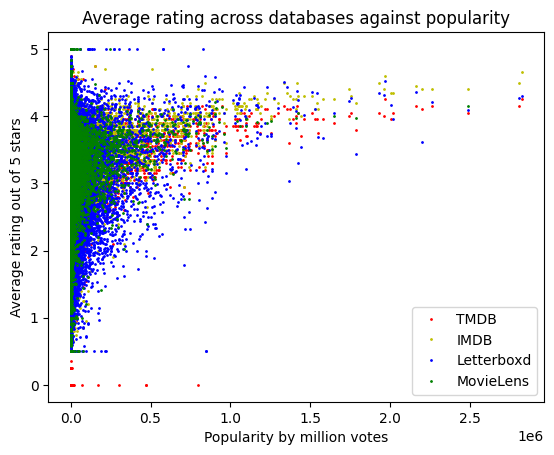

In [ ]:
plt.title('Average rating across databases against popularity')
plt.xlabel('Popularity by million votes')
plt.ylabel('Average rating out of 5 stars')
x_tmdb = np.array(list(tmdb_rating_vs_popularity.num_votes));
y_tmdb = np.array(list(tmdb_rating_vs_popularity.vote_average));
plt.plot(x_tmdb, y_tmdb, 'ro', markersize=1, label='TMDB')
x_imdb = np.array(list(imdb_rating_vs_popularity.num_votes));
y_imdb = np.array(list(imdb_rating_vs_popularity.vote_average));
plt.plot(x_imdb, y_imdb, 'yo', markersize=1, label='IMDB')
x_letterboxd = np.array(list(letterboxd_rating_vs_popularity.num_votes));
y_letterboxd = np.array(list(letterboxd_rating_vs_popularity.vote_average));
plt.plot(x_letterboxd, y_letterboxd, 'bo', markersize=1, label='Letterboxd')
x_movielens = np.array(list(movielens_rating_vs_popularity.num_votes));
y_movielens = np.array(list(movielens_rating_vs_popularity.vote_average));
plt.plot(x_movielens, y_movielens, 'go', markersize=1, label='MovieLens')
plt.legend(loc='lower right')

As we can see, there exists a strong positive correlation between popularity and movie ratings, irrespective of the movie database. This will be useful later on when rationalizing our weights in our ML predictions - because we know that there exists an underlying correlation with popularity and movie ratings, we can examine popularity against other movie characteristics, and from these coupled traits, we can predict ratings confidently, knowing that there exists a correlation with rating.

Some other interesting things to note with this graph - Letterboxd has by far the largest spread between ratings compared to other movie databases, perhaps attributed to the cult following that Letterboxd has acchieved amongst "film snobs" that may tend to go against the grain of popular opinion.

####Are user demographics such as occupation, age, and location correlated with movie popularity?

In order to examine the correlation between user demographics (more specifically occupation, age, and location) and movie popularity, the `MovieLens` dataset was explored to extract the demographics of individual reviews and their contributing popularity. Popularity was explored in two different lenses: rating and number of votes. For each demographic (gender, age, occupation, and location), the most popular population was found. This was done through average or summing the number of votes per demographic. For example, if gender and average rating were being analyzed, we would find the average rating given for all males and average rating given for all females and compare the two results to see which gender has a higher contributing factor.

First, we will analyze the correlation between user demographics and movie popularity in the lens of average rating.

#####User Demographic vs Popularity (Average Rating)

In [ ]:
  %%bigquery user_vs_ratings --project $project_id
  SELECT
    users.gender,
    users.age,
    users.occupation,
    users.zipCode,
    AVG(ratings.rating) as average_rating
  FROM
    `cs145-imdb.MovieLens.ratings` as ratings
  JOIN
    `cs145-imdb.MovieLens.users` as users
    ON ratings.userId = users.userId
  GROUP BY
    users.gender,
    users.age,
    users.occupation,
    users.zipCode
  ORDER BY
    average_rating DESC
  LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
user_vs_ratings.head()

,gender,age,occupation,zipCode,average_rating
0,M,25,0,48104,5.0
1,M,35,18,55448,5.0
2,M,35,17,53703,5.0
3,F,25,0,83355,5.0
4,M,35,18,98664,5.0


In order to understand the plots below (for both average rating and number of votes), the following tables should be used to correlate what indexes refer to what demographic groups.

In [ ]:
# age group
age_ref = pd.DataFrame({
    "Age Range ID": ["1", "18", "25", "35", "45", "50", "56"],
    "Age Group": ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
})

age_ref

,Age Range ID,Age Group
0,1,Under 18
1,18,18-24
2,25,25-34
3,35,35-44
4,45,45-49
5,50,50-55
6,56,56+


In [ ]:
# occupation group
occu_ref = pd.DataFrame({
    "Occupation ID": [i for i in range(21)],
    "Occupation Group": ["other", "academic/educator", "artist", "clerical/admin",
                         "college/grad student", "customer service", "doctor/health care",
                         "executive/managerial", "farmer", "homemaker", "K-12 student",
                         "lawyer", "programmer", "retired", "sales/marketing",
                         "scientist", "self-employed", "technician/engineer",
                         "tradesman/craftsman", "unemployed", "writer"]
})
occu_ref

,Occupation ID,Occupation Group
0,0,other
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


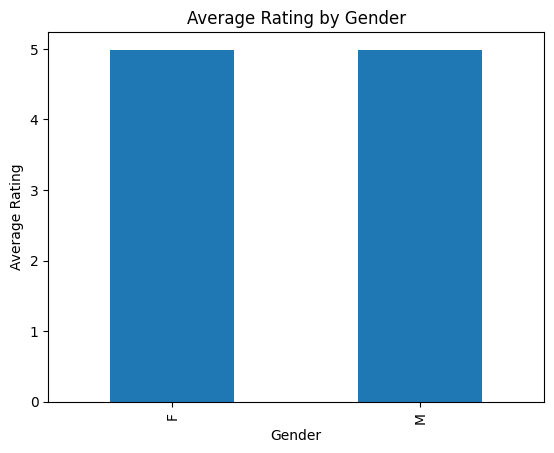

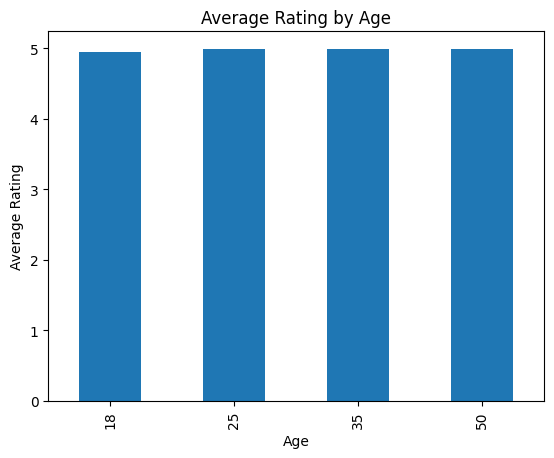

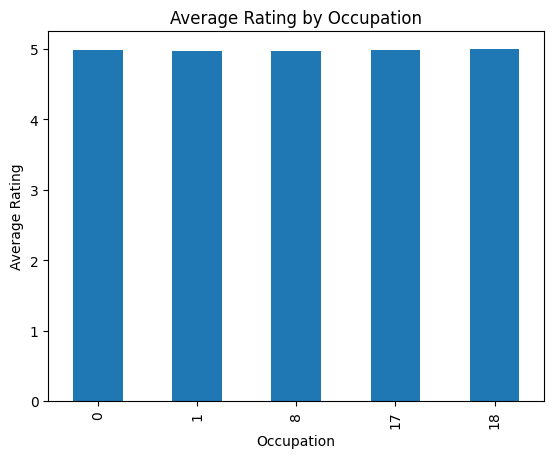

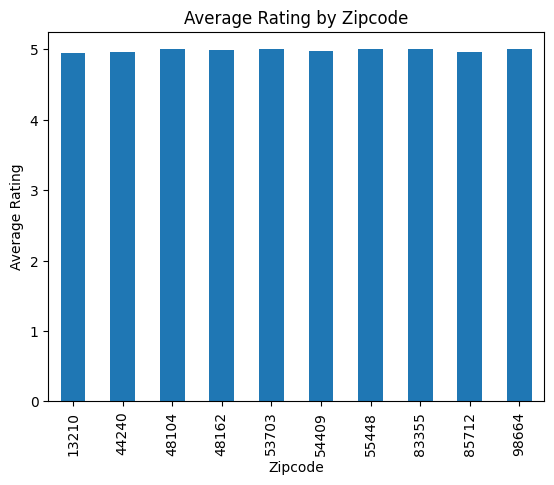

In [ ]:
# by gender
gender_grouped = user_vs_ratings.groupby('gender')['average_rating'].mean()
gender_grouped.plot(kind='bar')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

# by age
age_grouped = user_vs_ratings.groupby('age')['average_rating'].mean()
age_grouped.plot(kind='bar')
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.show()

# by occupation
occupation_grouped = user_vs_ratings.groupby('occupation')['average_rating'].mean()
occupation_grouped.plot(kind='bar')
plt.title('Average Rating by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# by zipcode
zipcode_grouped = user_vs_ratings.groupby('zipCode')['average_rating'].mean()
zipcode_grouped.plot(kind='bar')
plt.title('Average Rating by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

Looking at the plots above it is hard to conclude much information through analyzing popularity through average rating. We see that throughout all demographics, most populations give similar, high ratings. Thus in order to get ride of these unclarities, we will further analyze these demographics from the lens of number of votes.

#####User Demographic vs Popularity (Number of Votes)

In [ ]:
  %%bigquery user_vs_popularity --project $project_id
  SELECT
    users.gender,
    users.age,
    users.occupation,
    users.zipCode,
    AVG(movie_ratings.num_votes) as average_popularity
  FROM
    `cs145-imdb.MovieLens.users` as users
  JOIN
    `cs145-imdb.MovieLens.ratings` as ratings
    ON users.userId = ratings.userId
  JOIN
    `cs145-imdb.MovieLens.links` as links
    ON ratings.movieId = links.movieId
  JOIN
    `bigquery-public-data.imdb.title_ratings` as movie_ratings
    ON CAST(links.imdbId as STRING) = REGEXP_REPLACE(movie_ratings.tconst, '\\D', '')
  WHERE
    movie_ratings.num_votes is NOT NULL AND
    REGEXP_REPLACE(movie_ratings.tconst, '\\D', '') is NOT NULL
  GROUP BY
    users.gender,
    users.age,
    users.occupation,
    users.zipCode
  ORDER BY
    average_popularity DESC
  LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
user_vs_popularity.head()

,gender,age,occupation,zipCode,average_popularity
0,M,18,4,53142,2491233.0
1,F,35,16,77027,2491233.0
2,M,56,13,46143,2491233.0
3,M,25,17,95136,2491233.0
4,M,1,0,05667,2491233.0


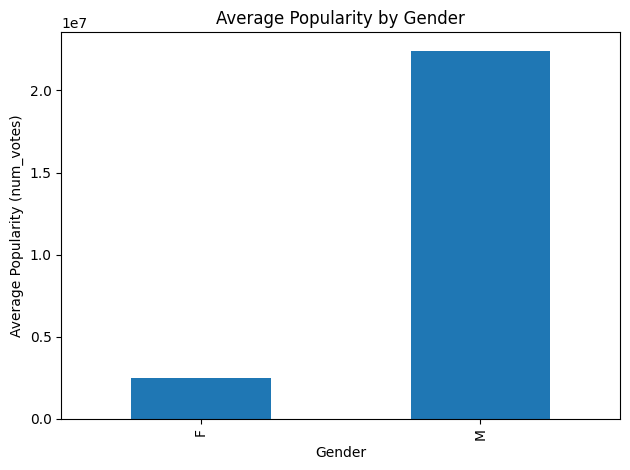

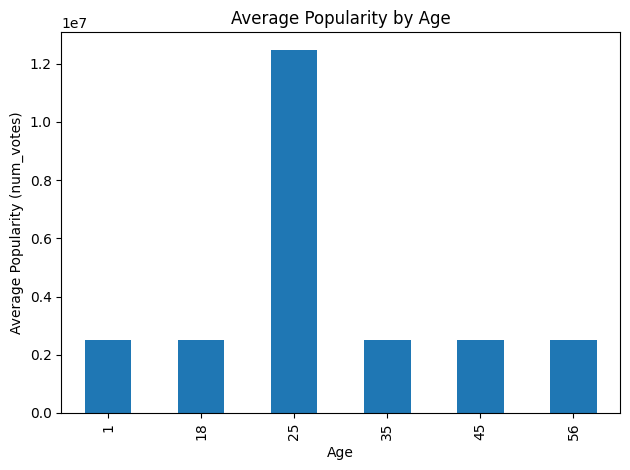

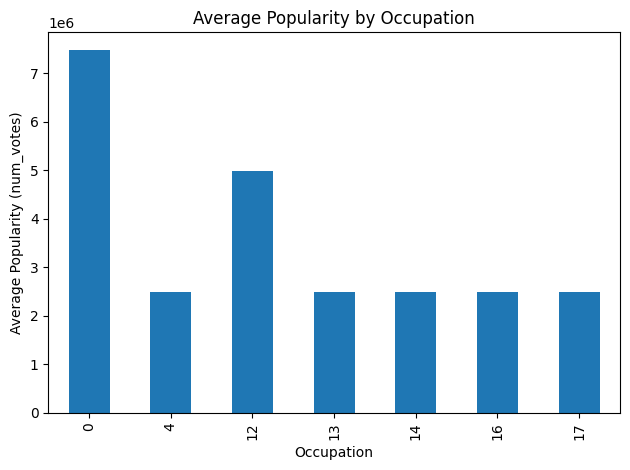

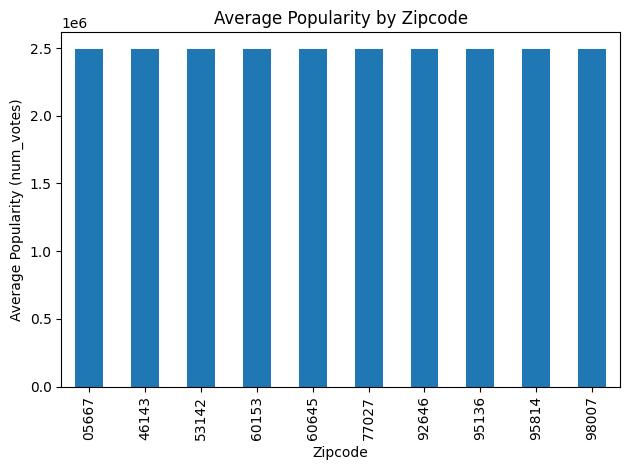

In [ ]:
# by gender
gender_grouped = user_vs_popularity.groupby('gender')['average_popularity'].sum()
gender_grouped.plot(kind='bar')
plt.title('Average Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Popularity (num_votes)')
plt.tight_layout()
plt.show()

# by age
age_grouped = user_vs_popularity.groupby('age')['average_popularity'].sum()
age_grouped.plot(kind='bar')
plt.title('Average Popularity by Age')
plt.xlabel('Age')
plt.ylabel('Average Popularity (num_votes)')
plt.tight_layout()
plt.show()

# by occupation
occupation_grouped = user_vs_popularity.groupby('occupation')['average_popularity'].sum()
occupation_grouped.plot(kind='bar')
plt.title('Average Popularity by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Popularity (num_votes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# by zipcode
zipcode_grouped = user_vs_popularity.groupby('zipCode')['average_popularity'].sum()
zipcode_grouped.plot(kind='bar')
plt.title('Average Popularity by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Popularity (num_votes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now we have a much clearer vision of what the data holds.

In regards to gender, we see that males have a higher popularity score than females, concluding that if a movie caters to men, it may have a higher popularity score.

As for Age, using the table above matching more specifically the age index to age range, we see that index 25 or age range "25-34" contributes the most to popular movies. This means that if a movie is most popular with the age range "25-34", it has the highest chance of gaining a high popularity score out of the other age ranges.

For Occupation, we see indexes 4 and 12 have the highest scores correlating to occupations "college/grad student" and "programmer" respectively. This implies that movies catering towards college students or programmers usually turn out to be more popular than if a movie was popular amongst other groups.

Finally, for zipcode, we see not much of a difference in plot between average rating and location implying that location is not a significant factor in determining a movie's popularity.

Using these conclusions between the graphs using average rating vs number of votes, we decided to proceed viewing popularity in the lens of number of votes as this better encapsulates the nuances in commerciality.

####Are there certain directors/writers, genres, or tags that are strongly correlated with higher popularity?
In order to explore this question, we compartmentalized the problem into 4 categories: Directors, Writers, Genres, and Tags. We will explore these subsections individually.

#####Exploring the most popular directors
First, we will analyze this question through looking at only directors. The most popular director was searched for through summing the total number of votes they have recieved for movies they have directed, and seeing who has the most. For example, if the movie "Se7en" had director "David Fincher" with a number of votes of 10,000,000, then "David Fincher" would gain 10,000,000 votes in popularity. If a movie has multiple directors, they will all recieve the same number of votes (the total number of votes of the movie). In detail, say movie "X" has directors "A" and "B" with a number of votes of 10. Then both "A" and "B" would recieve 10 points of popularity in our database.

A difficulty that was encountered within this exploratory stage was the structure of the `directors` and `writers` attributes. They were formatted as a string delimited by the character ','. In order to handle this, the `SPLIT` and `UNNEST` functions were used to extract the individual directors and their votes.

In [ ]:
  %%bigquery director_vs_popularity --project $project_id
  WITH FilmCrew AS (
    SELECT
      tc.tconst,
      tc.directors,
      SUM(tr.num_votes) as num_votes
    FROM
      `bigquery-public-data.imdb.title_crew` as tc
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON tc.tconst = tr.tconst
    WHERE
      tr.num_votes != 0
    GROUP BY
      tc.tconst, tc.directors
  ),

  Directors AS (
      SELECT
        SPLIT(directors, ',') as director_ids,
        num_votes
      FROM
        FilmCrew
  ),

  UnnestedDirectors AS (
      SELECT
        director_id,
        num_votes
      FROM
        Directors,
        UNNEST(director_ids) as director_id
      WHERE
        director_id IS NOT NULL
  ),

  AggregatedVotes AS (
      SELECT
        director_id,
        SUM(num_votes) as total_votes
      FROM
        UnnestedDirectors
      GROUP BY
        director_id
  )

  SELECT
    nb.primary_name as director_name,
    av.total_votes as average_popularity
  FROM
    AggregatedVotes av
  JOIN
    `bigquery-public-data.imdb.name_basics` nb
    ON nb.nconst = av.director_id
  ORDER BY
    total_votes DESC
  LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
director_vs_popularity.head()

,director_name,average_popularity
0,Christopher Nolan,15609304
1,Steven Spielberg,14396044
2,Quentin Tarantino,11801776
3,Martin Scorsese,10493483
4,David Fincher,9893817


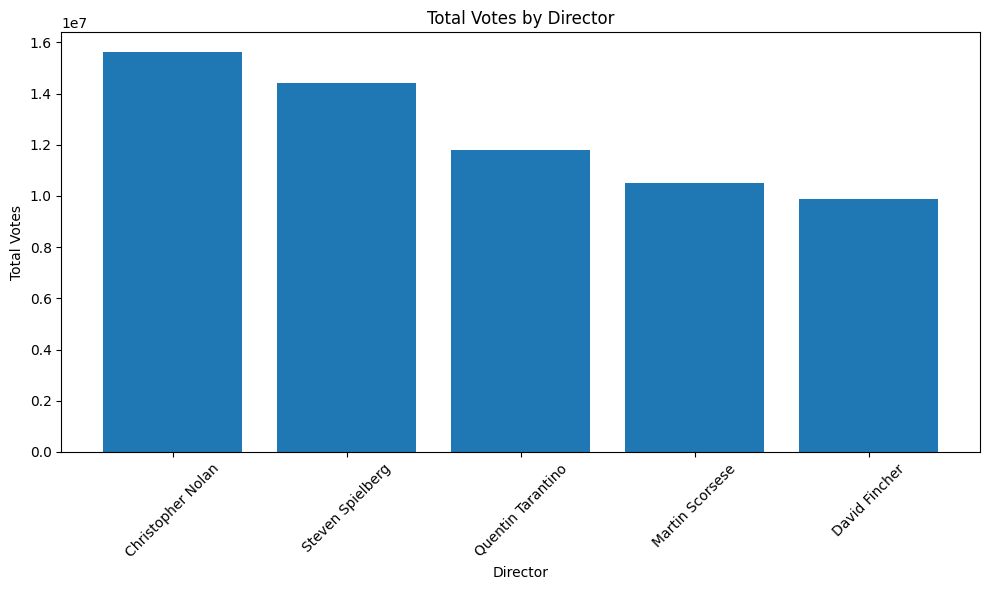

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(director_vs_popularity['director_name'], director_vs_popularity['average_popularity'])
plt.title('Total Votes by Director')
plt.xlabel('Director')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()

After the analysis, it can be concluded that Director Christopher Nolan seems to have the highest popularity. Thus it can be implied and concluded that movies directed by Christopher Nolan will typically have a higher popularity score.

#####Exploring the most popular writers
In order to analyze this subsection, the same was done for the writers as what was done for the directors. This was because the format of the two attributes was the same.

In [ ]:
  %%bigquery writer_vs_popularity --project $project_id
  WITH FilmCrew AS (
    SELECT
      tc.tconst,
      tc.writers,
      SUM(tr.num_votes) as num_votes
    FROM
      `bigquery-public-data.imdb.title_crew` as tc
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON tc.tconst = tr.tconst
    WHERE
      tr.num_votes != 0
    GROUP BY
      tc.tconst, tc.writers
  ),

  Writers AS (
      SELECT
        SPLIT(writers, ',') as writer_ids,
        num_votes
      FROM
        FilmCrew
  ),

  UnnestedWriters AS (
      SELECT
        writer_id,
        num_votes
      FROM
        Writers,
        UNNEST(writer_ids) as writer_id
      WHERE
        writer_id IS NOT NULL
  ),

  AggregatedVotes AS (
      SELECT
        writer_id,
        SUM(num_votes) as total_votes
      FROM
        UnnestedWriters
      GROUP BY
        writer_id
  )

  SELECT
    nb.primary_name as writer_name,
    av.total_votes as average_popularity
  FROM
    AggregatedVotes av
  JOIN
    `bigquery-public-data.imdb.name_basics` nb
    ON nb.nconst = av.writer_id
  ORDER BY
    total_votes DESC
  LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
writer_vs_popularity.head()

,writer_name,average_popularity
0,Stan Lee,27464946
1,Jack Kirby,24941289
2,George Lucas,16740121
3,Christopher Nolan,16113781
4,Bob Kane,14749258


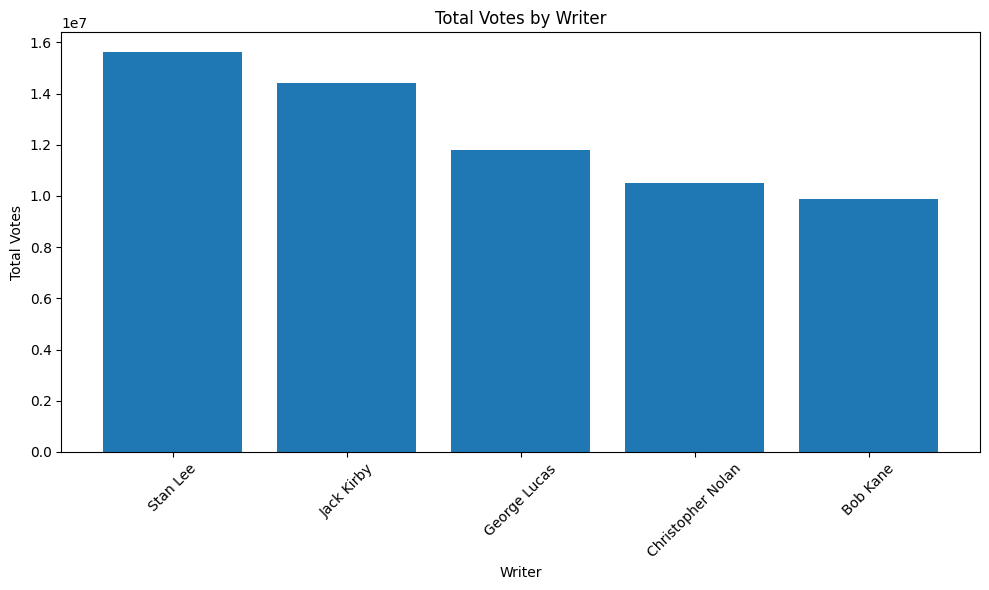

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(writer_vs_popularity['writer_name'], director_vs_popularity['average_popularity'])
plt.title('Total Votes by Writer')
plt.xlabel('Writer')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()

It can be concluded from the bar chart that writer Stan Lee seems to have the highest popularity influence due to his accumulation of votes on his movies. Therefore, this should be represented within the machine learning algorithm as movies written by Stan Lee have a higher possibility of achieving a high popularity score.

#####Exploring most popular genres

In order to explore this question, we search for the genre that has the highest number of votes. For example, if a movie "Deadpool" had genres "Action" and "Comedy" with a number of votes of 1,000,000, we would add 1,000,000 to both "Action" and "Comedy" categories to represent its popularity. Despite the double counting of votes that may exist, it was concluded that this was a more accurate measure of contributing popularity per movie for each genre.

In [ ]:
  %%bigquery pop_movie_genre --project $project_id

  WITH GenreRatings AS (
    SELECT
      links.imdbId,
      mlm.title,
      mlm.genres,
      tr.num_votes
    FROM
      `cs145-imdb.MovieLens.movies` as mlm
    JOIN
      `cs145-imdb.MovieLens.links` as links
      ON mlm.movieId = links.movieId
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON CAST(links.imdbId as STRING) = REGEXP_REPLACE(tr.tconst, '\\D', '')
    WHERE
      mlm.genres IS NOT NULL AND
      mlm.genres != '(no genres listed)' AND
      tr.num_votes IS NOT NULL AND
      REGEXP_REPLACE(tr.tconst, '\\D', '') is NOT NULL
  ),

  SplitGenres AS (
    SELECT
      imdbId,
      title,
      genre,
      num_votes
    FROM
      GenreRatings,
      UNNEST(SPLIT(genres, '|')) as genre
  ),

  RankedGenres AS (
    SELECT
      *
    FROM (
      SELECT
        imdbId,
        title,
        genre,
        num_votes,
        ROW_NUMBER() OVER (PARTITION BY imdbId ORDER BY num_votes DESC) as gr
      FROM
        SplitGenres
    )
    WHERE gr <= 3
  )

  SELECT
    genre,
    SUM(num_votes) as num_votes
  FROM
    RankedGenres
  GROUP BY
    genre
  ORDER BY
    num_votes DESC
  LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
pop_movie_genre.head()

,genre,num_votes
0,Drama,155480728
1,Action,120549518
2,Comedy,92936581
3,Adventure,75264421
4,Thriller,74369415


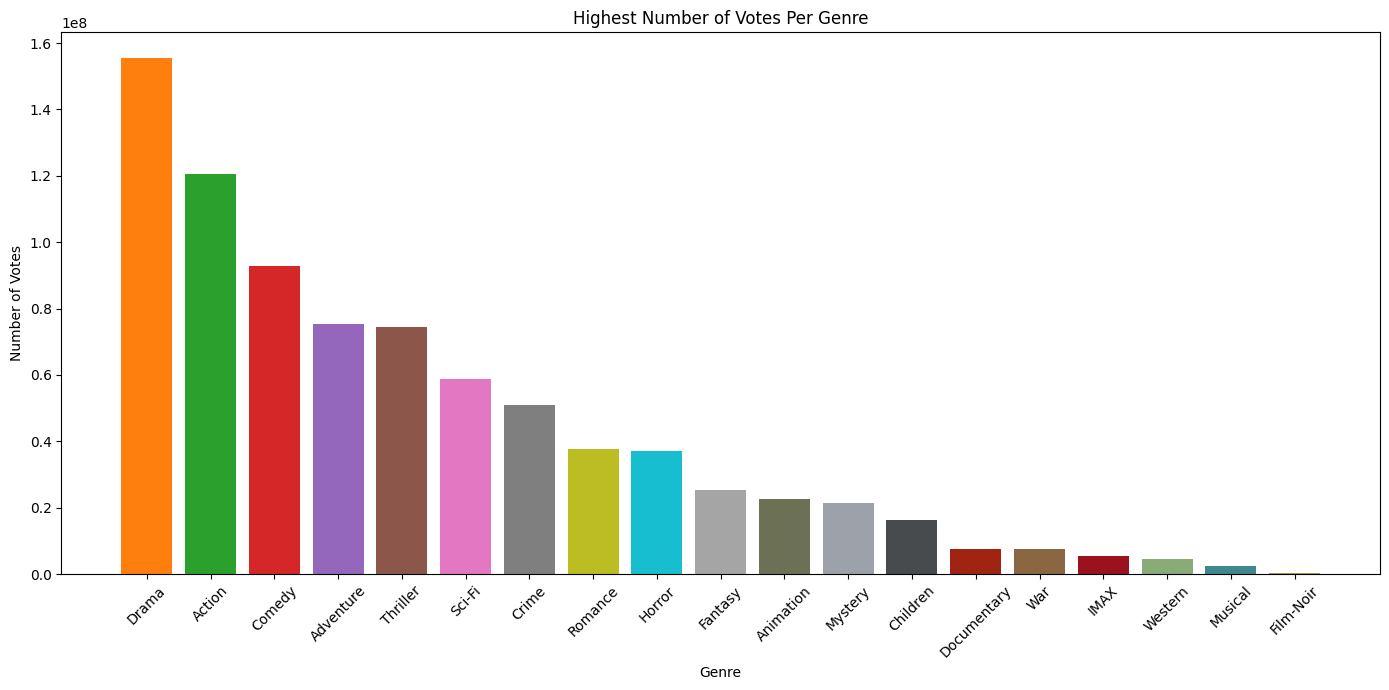

In [ ]:
genres = np.array(list(pop_movie_genre.genre));
votes = np.array(list(pop_movie_genre.num_votes.astype(int)));
plt.figure(figsize=(14, 7))
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#A5A5A5', '#6C7156', '#9DA1AA', '#474B4E', '#A12312',
          '#8A6642', '#9B111E', '#89AC76', '#3F888F', '#AEA04B']
bars = plt.bar(genres, votes, color=colors)
plt.title('Highest Number of Votes Per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.tight_layout()

Here it's clear that the "Drama" category has the highest popularity score while "Film-Noir" has the smallest. This leads to the conclusion that movies under the "Drama" category will tend to result in a higher popularity score compared to other genres. This will be represented in our machine learning dataset below.

#####Exploring most popular tags

We now wish to tally up which tags correlate to the most popular movies. In order to calculate this tally, we sum up the number of votes a tag has - for example, if The Dark Knight, Iron Man 2, and Deadpool is tagged with "superhero", then the "superhero" category would have sum the votes of The Dark Knight, Iron Man 2, and Deadpool. We limit 3 tags per movie, with these 3 tags being the most popular (i.e. these 3 tags were used the most in user tagging for that movie).

In [ ]:
%%bigquery tags_popularity --project $project_id

SELECT
  tag,
  SUM(num_votes) as total_votes
FROM (
  WITH pre AS (
  SELECT
    *
  FROM (
    SELECT
      m.movieId,
      m.title,
      t.tag,
      COUNT(t.userId) as num_tagged,
      ROW_NUMBER() OVER (PARTITION BY m.movieID ORDER BY COUNT(t.userId) desc) as tag_rank
    FROM
      `cs145-imdb.MovieLens.tags` t
    JOIN
      `cs145-imdb.MovieLens.movies` m
    ON
      t.movieId = m.movieId
    GROUP BY
      m.movieId, m.title, t.tag
    ORDER BY
      title
  )
  WHERE tag_rank <= 3
)

SELECT
  movieId,
  title,
  tag,
  imdbId,
  i.num_votes
FROM (
  SELECT
    pre.movieId,
    pre.title,
    pre.tag,
    CONCAT('tt',CAST(l.imdbId AS STRING)) as imdbId
  FROM
    pre
  JOIN
    `cs145-imdb.MovieLens.links` l
  ON
    l.movieId = pre.movieId
)
JOIN
  `bigquery-public-data.imdb.title_ratings` i
ON
  imdbId = i.tconst
)
GROUP BY
  tag
ORDER BY
  total_votes DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
tags_popularity.head()

,tag,total_votes
0,superhero,17380588
1,sci-fi,12876128
2,visually appealing,12357651
3,funny,10813245
4,Marvel,10690375


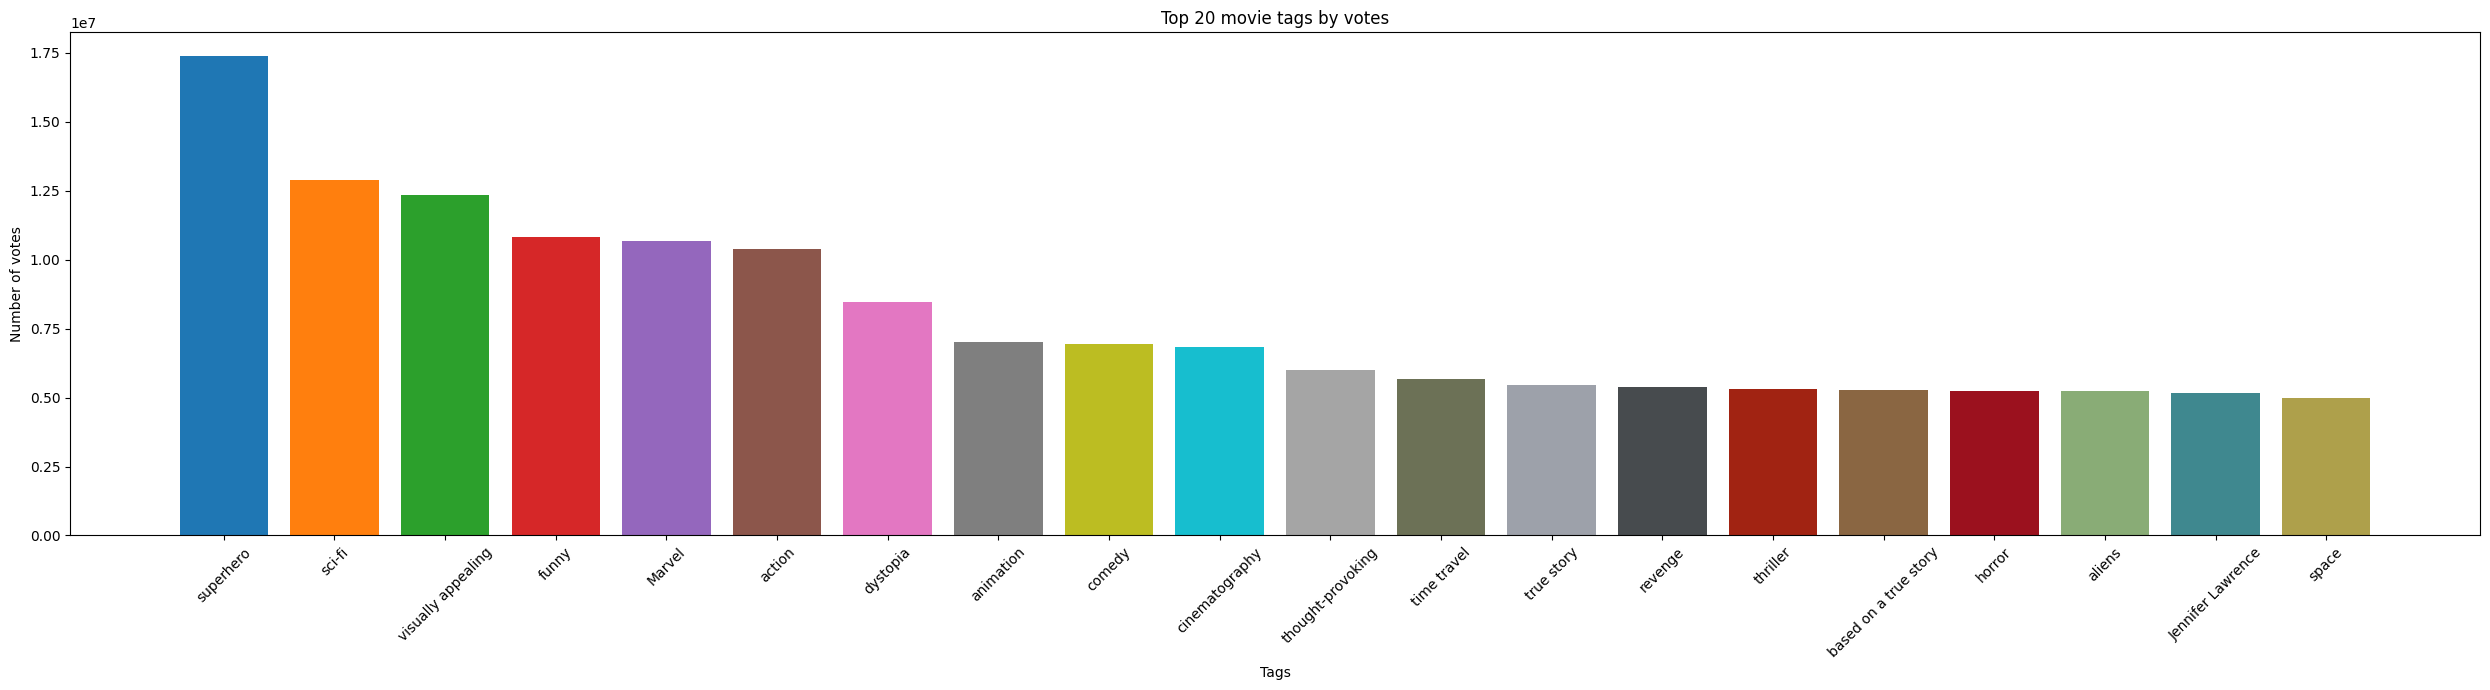

In [ ]:
tags = np.array(list(tags_popularity.tag));
total_tags = np.array(list(tags_popularity.total_votes));
plt.figure(figsize=(25, 7));
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#A5A5A5', '#6C7156', '#9DA1AA', '#474B4E', '#A12312',
          '#8A6642', '#9B111E', '#89AC76', '#3F888F', '#AEA04B']
plt.bar(tags, total_tags, color=colors);
plt.title('Top 20 movie tags by votes')
plt.xlabel('Tags')
plt.ylabel('Number of votes')
plt.xticks(rotation=45);
plt.tight_layout();

Analyzing the plot above we can conclude that movies tagged with the label "superhero" have the highest popularity score. Furthermore, this implies that superhero movies have a high tendency to achieve good popularity scores as supposed to say "space" or "horror". This will be represented in our data as movies tagged "superhero" will have the highest weight compared to tags like "action" or "comedy".

Using our conclusions from our data exploration we can now add respective weights depending on the attributes of a movie we are predicting. How we calculated these weights is further explained in the sections below.

## Baseline and Data Prediction

---

Now that we know the relationship between a movie's popularity and its rating, we can tackle our ML question that is related to our central question: **Using the aforementioned features weighted against relative popularity, can we predict a movie's rating?**. Our central question has validated the idea that there is a high variance between things like genre, tags, directors, and writers against popularity, and we know from our initial query that popularity and ratings are correlated, so our ML question bridges the gap and attempts to create accurate predictions. We will split this ML segment into two parts: in the first, we attempt to use the KNN algorithm based on engineered features to get aggregate target values, and in the second, we use BigQuery's exposed regression ML toolbox to create movie rating predictions.

####KNN Algorithm

In this section, we use four features: genre, tags, directors and writers. All four features are represented by words that are difficult to be quantified in a relational manner - one can create vectors that represent whether a movie has a certain genre, tag, director, and writer combination and use methods like cosine similarity to create numerical relationships, but not only would that require an incredibly large feature vector, it would also involve more complex python code in order to convert the given features into a numerical data vector. Therefore, in order to mitigate this, we create numerical representations of these features in relation to overall popularity. Because of our data explorations, we know the correlation between these features and overall popularity, so our calculations is as follows:

Consider genre feature $G$, tags features $T$, director feature $D$, and writer feature $W$, where $G_a$, $T_b$, $D_c$, $W_d$ are the weights relative to popularity the top genre $a$, a set of top 3 tags $[b]$, the top director $c$, and the top writer $c$ for a given movie.

*   We calculate the value $G_a$ for a given movie by taking the top 3 genres given, summing the votes for each genre, and then dividing the sum by total number of votes.
*   We calculate the value $T_b$ for a given movie by taking the top 3 tags given, averaging the votes for each tag, and then dividing the average by total number of votes.
*   We calculate the value $D_c$ for a given movie by taking the movie's top director's votes and dividing that number by the total number of votes.
*   We calculate the value $W_d$ for a given movie by taking the movie's top writer's votes and dividing that number by the total number of votes.

Our rational for computing these weights is because we have explored the correlation between these features and popularity previously in our data exploration section, and it also allows for a way to represent numerical relations between genres. By doing these weights, we stay in the limitations of the project as we do not need to use python code to compute these weights, and they subvert the need to do any text processing. Our first step involves creating four tables representing the tag weights of the genre, tag, director, and writer. We created these tables with a simple SQL query that contains the genre/tag/director/writer in one column, the number of votes associated with them, and then the relative weight computed by dividing the number of votes by the total number of votes. Then, for each movie, we pull the associated genre, tags, directors, and writers and represent those weights in their own columns. In order to ensure that compute times are not exceeded, we do the steps sequentially by creating the tables first, exporting the results, and then using the exported results in further SQL queries.



This computes the writer weights for a given movie, using the most popular writer of that movie.

In [ ]:
%%bigquery knn_table_writer --project $project_id
WITH FilmCrew AS (
    SELECT
      tc.tconst,
      tc.writers,
      SUM(tr.num_votes) as num_votes
    FROM
      `bigquery-public-data.imdb.title_crew` as tc
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON tc.tconst = tr.tconst
    WHERE
      tr.num_votes != 0
    GROUP BY
      tc.tconst, tc.writers
  ),

  Writers AS (
      SELECT
        tconst,
        SPLIT(writers, ',') as writer_ids,
        num_votes
      FROM
        FilmCrew
  ),

  UnnestedWriters AS (
      SELECT
        tconst,
        writer_id
      FROM
        Writers,
        UNNEST(writer_ids) as writer_id
      WHERE
        writer_id IS NOT NULL
  )

SELECT
  *
FROM (
  SELECT
    u.tconst,
    u.writer_id,
    n.primary_name,
    w.weight,
    ROW_NUMBER() OVER (PARTITION BY u.tconst ORDER BY COUNT(w.weight) desc) as writer_rank
  FROM
    UnnestedWriters u
  JOIN
    `bigquery-public-data.imdb.name_basics` n
  ON
    u.writer_id = n.nconst
  JOIN
    `cs145-llorente.cs145_knn.writers_weight` w
  ON
    n.primary_name = w.writer_name
  GROUP BY
    u.tconst,
    u.writer_id,
    n.primary_name,
    w.weight
  ORDER BY
    tconst
)
WHERE
  writer_rank = 1

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_writer.head()

,tconst,writer_id,primary_name,weight,writer_rank
0,tt0000009,nm0085156,Alexander Black,0.000010,1
1,tt0000036,nm0410331,Washington Irving,0.000079,1
2,tt0000076,nm0410331,Washington Irving,0.000079,1
3,tt0000091,nm0617588,Georges Méliès,0.000014,1
4,tt0000108,nm0410331,Washington Irving,0.000079,1


This computes the director weights for a given movie, using the most popular director of that movie.

In [ ]:
%%bigquery knn_table_director --project $project_id
WITH FilmCrew AS (
    SELECT
      tc.tconst,
      tc.directors,
      SUM(tr.num_votes) as num_votes
    FROM
      `bigquery-public-data.imdb.title_crew` as tc
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON tc.tconst = tr.tconst
    WHERE
      tr.num_votes != 0
    GROUP BY
      tc.tconst, tc.directors
  ),

  Directors AS (
      SELECT
        tconst,
        SPLIT(directors, ',') as director_ids,
        num_votes
      FROM
        FilmCrew
  ),

  UnnestedDirectors AS (
      SELECT
        tconst,
        director_id,
        num_votes
      FROM
        Directors,
        UNNEST(director_ids) as director_id
      WHERE
        director_id IS NOT NULL
  )
SELECT
  *
FROM (
  SELECT
    u.tconst,
    u.director_id,
    n.primary_name,
    d.weight,
    ROW_NUMBER() OVER (PARTITION BY u.tconst ORDER BY COUNT(d.weight) desc) as director_rank
  FROM
    UnnestedDirectors u
  JOIN
    `bigquery-public-data.imdb.name_basics` n
  ON
    u.director_id = n.nconst
  JOIN
    `cs145-llorente.cs145_knn.directors_weight` d
  ON
    n.primary_name = d.director_name
  GROUP BY
    u.tconst,
    u.director_id,
    n.primary_name,
    d.weight
  ORDER BY
    tconst
)
WHERE
  director_rank = 1

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_director.head()

,tconst,director_id,primary_name,weight,director_rank
0,tt0000001,nm0005690,William K.L. Dickson,0.000014,1
1,tt0000002,nm0721526,Émile Reynaud,0.000001,1
2,tt0000003,nm0721526,Émile Reynaud,0.000001,1
3,tt0000004,nm0721526,Émile Reynaud,0.000001,1
4,tt0000005,nm0005690,William K.L. Dickson,0.000014,1


This computes the tag weights for a given movie, using the average of the 3 most popular tags of that movie.

In [ ]:
%%bigquery knn_table_tag --project $project_id

SELECT
  CONCAT('tt',CAST(l.imdbId AS STRING)) as imdbId,
  title,
  AVG(weight) as tag_weight
FROM (
  SELECT
      *
  FROM (
    SELECT
      m.movieId,
      m.title,
      t.tag,
      COUNT(t.userId) as num_tagged,
      ROW_NUMBER() OVER (PARTITION BY m.movieID ORDER BY COUNT(t.userId) desc) as tag_rank
    FROM
      `cs145-imdb.MovieLens.tags` t
    JOIN
      `cs145-imdb.MovieLens.movies` m
    ON
      t.movieId = m.movieId
    GROUP BY
      m.movieId, m.title, t.tag
    ORDER BY
      title
  ) p
  JOIN
    `cs145-llorente.cs145_knn.tags_weight` t
  ON
    p.tag = t.tag
  WHERE
    tag_rank <= 3 AND
    weight BETWEEN 0 AND 1
) tt
JOIN
  `cs145-imdb.MovieLens.links` l
ON
  l.movieId = tt.movieId
GROUP BY
  imdbId, title


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_tag.head()

,imdbId,title,tag_weight
0,tt116365,"Frighteners, The (1996)",1.212167e-03
1,tt120056,"Saltmen of Tibet, The (Salzmänner von Tibet, D...",8.706949e-07
2,tt102728,Puppet Master III: Toulon's Revenge (1991),7.179173e-04
3,tt182299,Siegfried & Roy: The Magic Box (1999),1.944296e-04
4,tt245891,Extreme Days (2001),5.317853e-04


This computes the genre weights for a given movie, using the average of the 3 most popular genres of that movie.

In [ ]:
%%bigquery knn_table_genre --project $project_id

WITH GenreRatings AS (
    SELECT
      links.imdbId,
      mlm.title,
      mlm.genres,
      tr.num_votes
    FROM
      `cs145-imdb.MovieLens.movies` as mlm
    JOIN
      `cs145-imdb.MovieLens.links` as links
      ON mlm.movieId = links.movieId
    JOIN
      `bigquery-public-data.imdb.title_ratings` as tr
      ON CAST(links.imdbId as STRING) = REGEXP_REPLACE(tr.tconst, '\\D', '')
    WHERE
      mlm.genres IS NOT NULL AND
      mlm.genres != '(no genres listed)' AND
      tr.num_votes IS NOT NULL AND
      REGEXP_REPLACE(tr.tconst, '\\D', '') is NOT NULL
  ),

  SplitGenres AS (
    SELECT
      imdbId,
      title,
      genre,
      num_votes
    FROM
      GenreRatings,
      UNNEST(SPLIT(genres, '|')) as genre
  ),

  RankedGenres AS (
    SELECT
      *
    FROM (
      SELECT
        imdbId,
        title,
        genre,
        num_votes,
        ROW_NUMBER() OVER (PARTITION BY imdbId ORDER BY num_votes DESC) as gr
      FROM
        SplitGenres
    )
    WHERE gr <= 3

  ),

  Weights AS (
    SELECT
      CONCAT('tt',CAST(imdbId AS STRING)) as imdbId,
      title,
      r.genre,
      g.weight
    FROM
      RankedGenres r
    JOIN
      `cs145-llorente.cs145_knn.genres_weight` g
    ON
      r.genre = g.genre
    ORDER BY
      imdbId
  )

SELECT
  imdbId,
  title,
  AVG(weight) as genre_weight
FROM
  weights
GROUP BY
  imdbId,
  title

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_genre.head()

,imdbId,title,genre_weight
0,tt6946580,Lego Scooby-Doo! Blowout Beach Bash (2017),0.069971
1,tt1037850,Secret (2007),0.089233
2,tt1086798,Unstable Fables: Tortoise vs. Hare (2008),0.079289
3,tt1843840,The Last Time I Saw Macao (2012),0.050145
4,tt2452242,Happy! (2017),0.031054


Now we combine the genre, tag, director, and writer weight tables together, combining these columns when the IMDB ID matches. The resulting table outputs the weights for every movie, separated by column.

In [ ]:
%%bigquery knn_table_full --project $project_id

SELECT
  g.imdbId,
  g.title,
  g.genre_weight,
  t.tag_weight,
  d.weight as director_weight,
  w.weight as writer_weight,
  r.average_rating/2 as average_rating
FROM
  `cs145-llorente.cs145_knn.movie_director_weight` d
JOIN
  `cs145-llorente.cs145_knn.movie_genre_weight` g
ON
  d.tconst = g.imdbId
JOIN
  `cs145-llorente.cs145_knn.movie_tag_weight` t
ON
  g.imdbId = t.imdbId
JOIN
  `cs145-llorente.cs145_knn.movie_writer_weight` w
ON
  t.imdbId = w.tconst
JOIN
  `bigquery-public-data.imdb.title_ratings`r
ON
  g.imdbId = r.tconst


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_full.head()

,imdbId,title,genre_weight,tag_weight,director_weight,writer_weight,average_rating
0,tt1027874,InAlienable (2008),0.117875,0.000655,0.000003,2.416637e-06,1.70
1,tt1034305,Don't Look Up (2009),0.068327,0.000036,0.000013,2.027541e-06,1.55
2,tt1038072,Pulse 2: Afterlife (2008),0.069530,0.001773,0.000005,2.669242e-05,1.70
3,tt1038685,"King of Fighters, The (2010)",0.109787,0.000251,0.000030,7.484782e-07,1.55
4,tt1049413,Up (2009),0.046542,0.002638,0.000303,5.126260e-04,4.15


We save the resulting table in a new table in order to keep further queries efficient. Now, we perform the KNN algorithm in the below code. We rely on doing a cross join while computing the root mean squared error for every single combination of movie, and then apply a ranking to sort the table from smallest distance to largest distance, for each movie. Now all we have to do to predict a movie's rating is choose the top K movies with the smallest root mean squared errors associated to the movie we want to predict, and then take the average rating of those top K movies.

In [ ]:
%%bigquery knn_table_final --project $project_id

SELECT
  t1.imdbId as movie1_imdb,
  t1.title as movie1_title,
  t2.imdbId as movie2_imdb,
  t2.title as movie2_title,
  t2.average_rating as movie2_rating,
  SQRT(POW(t1.genre_weight - t2.genre_weight, 2) + POW(t1.tag_weight - t2.tag_weight, 2) + POW(t1.director_weight - t2.director_weight, 2) + POW(t1.writer_weight - t2.writer_weight, 2)) as euclid_distance,
  ROW_NUMBER() OVER (PARTITION BY t1.imdbId ORDER BY (SQRT(POW(t1.genre_weight - t2.genre_weight, 2) + POW(t1.tag_weight - t2.tag_weight, 2) + POW(t1.director_weight - t2.director_weight, 2) + POW(t1.writer_weight - t2.writer_weight, 2))) ASC) as distance_rank
FROM
  `cs145-llorente.cs145_knn.knn_pre` t1
CROSS JOIN
  `cs145-llorente.cs145_knn.knn_pre` t2
WHERE
  t1.imdbId != t2.imdbId
ORDER BY
  t1.imdbId DESC,
  distance_rank ASC


ERROR:
 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/$project_id/jobs?prettyPrint=false: ProjectId and DatasetId must be non-empty

Location: None
Job ID: 48462b98-174d-44c9-8dc6-a07783b54d80



In [ ]:
knn_table_final.head()

Note: it is a large dataset - so just in case the query did not work, the following is an image preview of the result.
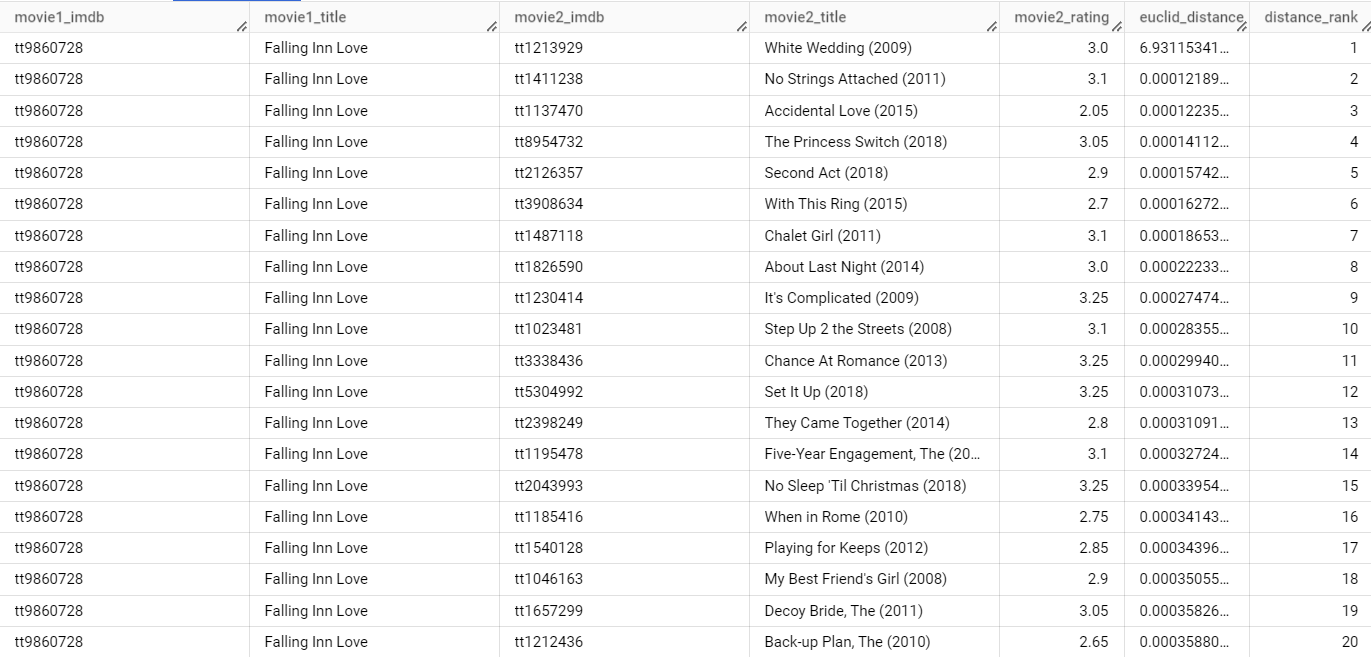

After running this query, we save the result in its own table and take the average rating of the top K associated movies for every movie to predict the movie's rating. Choosing K is a difficult task, especially with only 4 engineered features and over 13,000 movies. As a general rule of thumb, we can choose $K = sqrt(n)/2$ where $n$ in our case is the number of movies. We get $k$ to be roughly equal to 60, so we take the average of the top 60 movies ratings as our prediction. In order to nromalize our predictions to the ML alternative, we round the ratings to a half-star, e.g. a rating of 3.3 would be rounded to a 3.5, and a rating of 3.2 would be rounded to a 3.0. To follow the percent accuracy, we only accept predictions that are exactly matching the average ratings, calculating the percentage over all the rows and outputting this value.

In [ ]:
%%bigquery knn_table_percent_error --project $project_id

SELECT
  SUM(CASE WHEN predicted_rating = actual_rating THEN 1 ELSE 0 END) * 100 / count(*)
FROM (
  SELECT
    movie1_imdb,
    movie1_title,
    ROUND((ROUND(AVG(movie2_rating)/5, 1) * 5), 1) as predicted_rating,
    ROUND((ROUND(r.average_rating/10, 1) * 5), 1) as actual_rating,
    ABS((ROUND((ROUND(AVG(movie2_rating)/5, 1) * 5), 1) - ROUND((ROUND(r.average_rating/10, 1) * 5), 1)) / (ROUND((ROUND(r.average_rating/10, 1) * 5), 1))) as percent_error
  FROM (
    SELECT
      *
    FROM
      `cs145-llorente.cs145_knn.knn_final`
    WHERE
      distance_rank <= 60
  ) k
  JOIN
    `bigquery-public-data.imdb.title_ratings` r
  ON
    k.movie1_imdb = r.tconst
  GROUP BY
    movie1_imdb,
    movie1_title,
    r.average_rating
)

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_table_percent_error.head()

,f0_
0,37.951494


We end up getting 37.95% as our percentage accuracy using this KNN model. Let us now use ML to predict these ratings, and then we can compare how the two models are.

####ML Predictions

We first begin by creating the dataset - it's important to note that we had to adjust the ratings to now be rounded to the nearest half-star as the ML prediction model outputs predicted ratings on a half star basis.


In [ ]:
model_dataset_name = 'movies_ml'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('cs145-llorente', 'movies_ml'))

WARNING: IF YOU CLICK THIS FOLLOWING CELL, YOU MUST RETRAIN, REEVALUATE, AND REPREDICT AS IT CHANGES THE TRAINING DATASET!!!

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE cs145_knn.random_knn AS

SELECT
  imdbId,
  title,
  genre_weight,
  tag_weight,
  director_weight,
  writer_weight,
  ROUND((ROUND(average_rating/5, 1) * 5), 1) as label,
  RAND() AS random_number
FROM
  `cs145-llorente.cs145_knn.knn_pre`;


Query is running:   0%|          |

""


Train dataset. In order to fairly select which movies we use as training data, we split it on random numbers where 70% is use to train, 15% is used to test, and 15% is used for predictions.

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `movies_ml.movies_model`
OPTIONS(model_type='logistic_reg') AS
SELECT
  genre_weight,
  tag_weight,
  director_weight,
  writer_weight,
  label as label
FROM
  `cs145-llorente.cs145_knn.random_knn`
WHERE
  random_number < 0.7

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `movies_ml.movies_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,1,0.063405,0.091689,0.4,14272
1,0,0,0.082366,0.092008,0.2,10418


Evaluate on different data from the one we trained with.

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.EVALUATE(MODEL `movies_ml.movies_model`, (
SELECT
  *
FROM
  `cs145-llorente.cs145_knn.random_knn`
WHERE
  random_number >= 0.7 and random_number < 0.85))

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.099359,0.097056,0.299694,0.078164,2.824762,0.597626


Now let's predict on new, unseen data.

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

SELECT
  predicted_label,
  genre_weight,
  tag_weight,
  director_weight,
  writer_weight,
  label
FROM
  ML.PREDICT(MODEL `movies_ml.movies_model`, (
SELECT
  *
FROM
  `cs145-llorente.cs145_knn.random_knn`
WHERE
  random_number >= 0.85
))


Query is running:   0%|          |

Downloading:   0%|          |

,predicted_label,genre_weight,tag_weight,director_weight,writer_weight,label
0,3.0,0.190407,0.000036,2.631951e-04,1.241365e-04,3.5
1,3.5,0.045579,0.001162,3.730325e-06,7.541377e-07,2.5
2,3.5,0.080030,0.002293,2.022187e-05,1.806944e-05,3.0
3,3.0,0.190407,0.000097,3.182027e-06,4.054453e-06,3.5
4,3.0,0.190407,0.001907,4.899394e-07,1.446335e-08,2.5
...,...,...,...,...,...,...
1992,3.5,0.085478,0.000005,3.785263e-05,2.972847e-07,3.0
1993,3.5,0.111131,0.000510,2.468643e-05,9.721884e-07,1.5
1994,3.5,0.068327,0.002906,9.081548e-05,5.378793e-05,2.5
1995,3.5,0.143403,0.000223,3.699924e-06,8.667003e-07,2.5


We see that we get about a 30% accuracy, a roughly 8% decrease from our KNN alogrithm. This accuracy corresponds to whether or not the predicted rating matches the actual rating - 30% implies that of the movies in our dataset, using our features we were able to get a 30% correctly predicted rate. This is how we also measured our accuracy when performing the KNN algorithm.

####Comparison

We notice that our KNN alogrithm is slightly more accurate than our ML model by roughly 8%. While small, it may be significant, especially because our movie dataset was only ~13,000 movies. It is possible that because our labels were only from a 0-5 scale in increasing 0.5 increments, taking the average would simply result in a smaller error, minimizing the risk of inaccuracy compared to the precision that logistic regression provides. In any scenario however, the time to create and process the KNN alogrithm is much larger than that of the ML model simply because of the use of cross joins that result in an incredibly large table that requires heavy computations and storage. Despite the higher accuracy provided by the KNN algorithm, the ML solution may be favoured simply due to the less time required in order to create, train, and evaluate large datasets. Concurrently, the KNN algorithm will be more expensive because of these higher IO costs. If we had significantly more movies than just the ~13,000 we had, it would undoubtedly take order of magnitudes more time to compute the self joined tables that KNN needs. Therefore, the ML model would be favored in scenarios when there exists, for example, a million movies in a dataset. But even then - reaching that large number of movies with enough ratings and popularity is quite a difficult task. The main tradeoffs present in thes predictions are the IO costs and monetary costs, and again, some users may deem the 8% increase in accuracy prediction to not be enough to surmount the hefty IO and monetary costs of the KNN algorithm.

## Conclusion

In conclusion, we were able to firstly detect a correlation between movie popularities and movie ratings. We then found a correlation between several movie characteristics like genre, tags, and directors against popularities. Lastly, we coupled the two to create ML predictions on a movie's ratings, using both KNN and regular logistic regression. In the end, we found that KNN predicted slightly better than ML logistic regression, but the slight difference could account for many things other than an actually good algorithm, such as a small choice in dataset.

It's important to note that, due to the limitations of the project, we were severely limited in the features we could choose when creating our ML predictions. In future explorations, it would be more advisable to use complex Python to create feature vectors which we could apply techniques like cosine similarity on. Additionally, our main attempt was done in order to fill in a gap that others had not explored - landing us in focalizing on movie popularity against movie ratings. We saw positive correlations amongst the popularity couple with all movie characteristics against movie ratings, but this may not equate to causality. Another limitation could be the fact that votes were double counted, i.e. voters could tag a movie as both drama and action and a plethora of other tags with no limit. This also adds another implication as some movies could be tagged with much less tags than other movies, as movie tagging provided neither a limit nor a minimum. This goes with the genre, director, and writer characteristics, so it may have been better to do something like a weighted average in our computations. Despite this, we were happy with our accuracy results in both KNN and ML predictions.

To explain our data points, it goes deeper than just movie genres or directors or tags in tandem with popularity to predict movie ratings. There are many attributes that are simply not represented in data sets, such as advertising costs, trends going on when the movie was released, or news controversies surrounding artists or genres. These are largely unquantifiable in the scope of our project, making our predictions much more difficult. It would be very interesting to see how sites like Netflix or HBO make their ratings and recommendations with these aspects in mind.

One thing interesting to see is that many movies can be subjectively tagged. For example, I might consider the Minions as drama, while a different tagger coud consider that same movie as comedy. These tags are largely subjective, but with our rather large dataset of tags, we were hopeful that the majority would be represented accordingly. And one glaring thing is that there are indeed many movies that are not very popular but have high ratings due, and conversely there are many movies that are very popular but have poorer ratings. In spite of this, there still does exist a general correlation, but the prediction models will likely falter when it comes to those movies that lie on the polar ends of the spectrum.

Overall, this project has been plenty of fun as we were also able to see which movies we should watch next. It would have been fantastic had we had richer datasets, for example datasets that related movies to user and country demographics. Still, we were able to see just how powerful dataset analysis is and how useful the techniques we learn in class are.
